In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("E:\Data sets\wineQualityReds.csv")

In [7]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.shape

(1599, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
df.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [12]:
#to get the value of which no. has how much count
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [13]:
# to convert from row to column use .T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed.acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile.acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric.acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual.sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free.sulfur.dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total.sulfur.dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [14]:
# to check duplicate values
df.duplicated().sum()

240

In [15]:
#to drop duplicate value
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
X = df.drop('quality', axis=1)
X.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [18]:
y = df.quality
y.head()

0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
X_train.shape

(1087, 11)

In [21]:
X_test.shape

(272, 11)

In [22]:
#will get diff score  as everytime diff value is selected in decison tree
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.4889705882352941

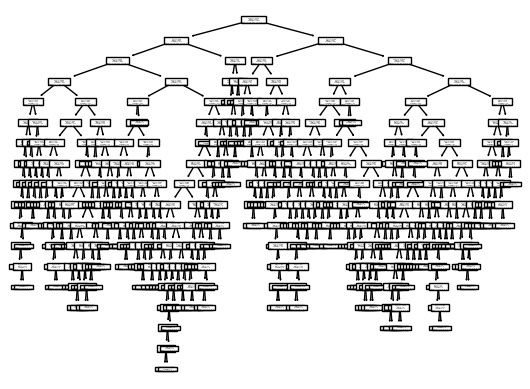

<Figure size 2500x1500 with 0 Axes>

In [23]:
from sklearn import tree
tree.plot_tree(model.fit(X_train,y_train))
plt.figure(figsize=(25,15))
plt.show()

In [24]:
y_pred = model.predict(X_test)
y_pred

array([5, 6, 7, 5, 6, 7, 6, 5, 6, 5, 5, 6, 5, 5, 7, 5, 6, 5, 5, 6, 5, 7,
       5, 6, 5, 5, 6, 5, 5, 6, 5, 7, 6, 6, 6, 6, 5, 6, 3, 7, 4, 6, 5, 5,
       5, 5, 4, 5, 5, 5, 6, 5, 6, 4, 7, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6,
       5, 5, 6, 7, 6, 7, 6, 7, 6, 5, 5, 7, 5, 5, 6, 5, 6, 6, 5, 7, 5, 5,
       6, 6, 4, 5, 5, 6, 6, 6, 5, 7, 7, 5, 5, 3, 5, 6, 6, 5, 6, 6, 7, 7,
       6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 4, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5,
       6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5,
       6, 6, 4, 5, 6, 6, 6, 5, 5, 5, 6, 7, 7, 5, 6, 4, 7, 6, 5, 6, 5, 5,
       5, 5, 6, 7, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 4, 5, 7, 6, 6, 6, 6, 5,
       6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 7, 6, 7, 7, 5, 7,
       6, 7, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 7, 6, 6, 8, 6, 5, 5, 5, 5, 5,
       5, 6, 7, 5, 5, 6, 6, 5, 6, 5, 7, 6, 5, 6, 3, 5, 5, 6, 7, 6, 5, 6,
       6, 6, 6, 4, 6, 5, 8, 6], dtype=int64)

In [25]:
cm = confusion_matrix(y_test,y_pred)

<Axes: >

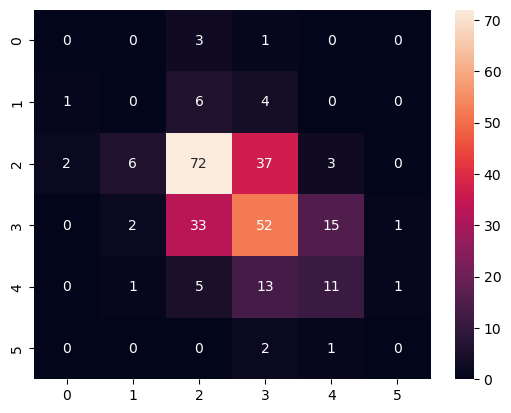

In [26]:
import seaborn as sns
sns.heatmap(cm,annot=True)

# Adaboost

In [27]:
from sklearn.ensemble import AdaBoostClassifier
model1 = AdaBoostClassifier()
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.5477941176470589

In [28]:
# learning rate is basically the accuracy that we want to increase
model2 = AdaBoostClassifier(learning_rate= 0.02,n_estimators= 120)
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.5735294117647058

In [29]:
y_pred = model.predict(X_test)
y_pred

array([5, 6, 7, 5, 6, 7, 6, 5, 6, 5, 5, 6, 5, 5, 7, 5, 6, 5, 5, 6, 5, 7,
       5, 6, 5, 5, 6, 5, 5, 6, 5, 7, 6, 6, 6, 6, 5, 6, 3, 7, 4, 6, 5, 5,
       5, 5, 4, 5, 5, 5, 6, 5, 6, 4, 7, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6,
       5, 5, 6, 7, 6, 7, 6, 7, 6, 5, 5, 7, 5, 5, 6, 5, 6, 6, 5, 7, 5, 5,
       6, 6, 4, 5, 5, 6, 6, 6, 5, 7, 7, 5, 5, 3, 5, 6, 6, 5, 6, 6, 7, 7,
       6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 4, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5,
       6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5,
       6, 6, 4, 5, 6, 6, 6, 5, 5, 5, 6, 7, 7, 5, 6, 4, 7, 6, 5, 6, 5, 5,
       5, 5, 6, 7, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 4, 5, 7, 6, 6, 6, 6, 5,
       6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 7, 6, 7, 7, 5, 7,
       6, 7, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 7, 6, 6, 8, 6, 5, 5, 5, 5, 5,
       5, 6, 7, 5, 5, 6, 6, 5, 6, 5, 7, 6, 5, 6, 3, 5, 5, 6, 7, 6, 5, 6,
       6, 6, 6, 4, 6, 5, 8, 6], dtype=int64)

In [30]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 0,  0,  3,  1,  0,  0],
       [ 1,  0,  6,  4,  0,  0],
       [ 2,  6, 72, 37,  3,  0],
       [ 0,  2, 33, 52, 15,  1],
       [ 0,  1,  5, 13, 11,  1],
       [ 0,  0,  0,  2,  1,  0]], dtype=int64)

<Axes: >

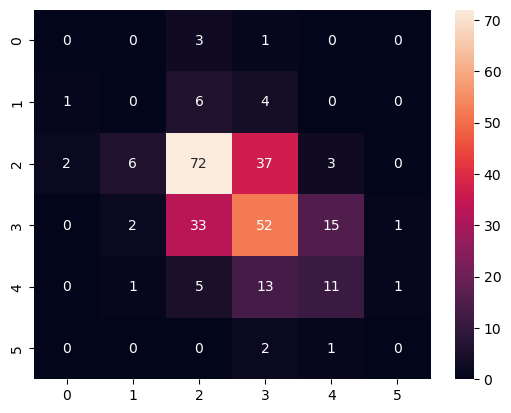

In [31]:
sns.heatmap(cm,annot=True)

# gradient boost

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
model3 = GradientBoostingClassifier()
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.6102941176470589

# gradient boosting with hyperparameter tunning

In [42]:
model3 = GradientBoostingClassifier(n_estimators=300, learning_rate=0.02,random_state=100, max_features=5)
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.6323529411764706

# XG Boost 

In [44]:
!pip install xgboost

In [46]:
import xgboost 

In [57]:
# XGBoosting requires column to start from 0. here it may give some error
# therefore label encoder is used to label the column

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)


In [58]:
 boost = xgboost.XGBClassifier()
boost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [60]:
boost.score(X_test,y_test)

0.0

In [63]:
y_pred= boost.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
cm= confusion_matrix(y_test,y_pred)

In [64]:
import seaborn as sns

<Axes: >

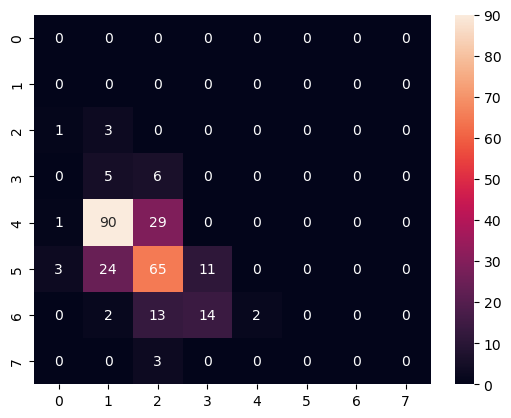

In [67]:
sns.heatmap(cm,annot=True)